In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
from functools import reduce

In [3]:
events = pd.read_csv("timeseries_events.csv")
users  = pd.read_csv("timeseries_users.csv")
events = events.drop_duplicates() #many duplocates! idk if it was intentionally (to have same event for a user) or not I removed them, simply comment
users  = users.drop_duplicates()

#P1 from the last part I don't need to this again.... obviously
df_events_users = pd.merge(events, users, how ='left', on=['user_id']) 
df_events_users.dropna(inplace=True)
df_events_users = df_events_users[(df_events_users["age"] >= 30) & (df_events_users["gender"] == 'm')].reset_index()


In [4]:
df_events_users_interevent_intervals=df_events_users.copy()
df_events_users_interevent_intervals['event_date_casted'] = df_events_users_interevent_intervals['event_date'].astype('datetime64[ns]')
df_events_users_interevent_intervals=df_events_users_interevent_intervals.sort_values(['user_id','event_date_casted'])
df_events_users_interevent_intervals_o = df_events_users_interevent_intervals[['user_id','event_date']]
df_events_users_interevent_intervals = df_events_users_interevent_intervals[['user_id','event_date_casted']]

df_events_users_interevent_intervals_diff=df_events_users_interevent_intervals.diff()
df_events_users_interevent_intervals_diff.rename(columns = {'user_id':'user_id_diff'}, inplace = True)
df_events_users_interevent_intervals_diff.rename(columns = {'event_date_casted':'inter_events'}, inplace = True)
df_events_users_interevent_intervals = pd.concat([df_events_users_interevent_intervals_o,df_events_users_interevent_intervals_diff], axis=1)
df_events_users_interevent_intervals.dropna(inplace=True)
df_events_users_interevent_intervals=df_events_users_interevent_intervals[df_events_users_interevent_intervals.user_id_diff==0.0]




Text(0, 0.5, 'Average Inter Event')

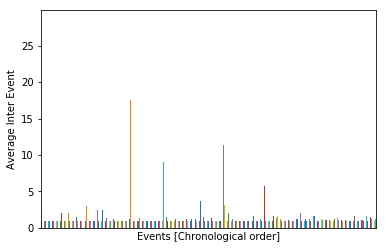

In [13]:
#average of inter-event duration for each event (start time)
df_avg_interevent_intervals_event = df_events_users_interevent_intervals.copy()
df_avg_interevent_intervals_event['inter_events'] = (df_avg_interevent_intervals_event['inter_events']).dt.days

df_avg_interevent_intervals_event.groupby('event_date')['inter_events'].mean().plot.bar()
plt.xticks([],)
plt.xlabel('Events [Chronological order]')
plt.ylabel('Average Inter Event')

Text(27.0, 0.5, 'Average Inter Events')

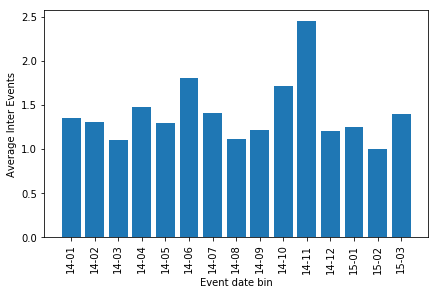

In [14]:
#average of inter-event duration for each bin-event (start time)
#temp
df_avg_interevent_intervals_event['inter_events_avg'] = df_avg_interevent_intervals_event.groupby('event_date')['inter_events'].transform(np.mean)
df_avg_interevent_intervals_event = df_avg_interevent_intervals_event[['event_date','inter_events_avg']]
df_avg_interevent_intervals_event.drop_duplicates()
#temp
bins_dt = pd.date_range('2014-01-01', freq='1M', periods=20) #bins
bins_str = bins_dt.astype(str).values
labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]
df_avg_interevent_intervals_event['event_date'] = df_avg_interevent_intervals_event['event_date'].astype('datetime64[ns]')
df_avg_interevent_intervals_event['event_date_range'] = pd.cut(df_avg_interevent_intervals_event.event_date.astype(np.int64)//10**9,bins=bins_dt.astype(np.int64)//10**9,labels=labels)
df_avg_interevent_intervals_event['event_date_range_inter_events_avg'] = df_avg_interevent_intervals_event.groupby('event_date_range')['inter_events_avg'].transform(np.mean) # Adds new column for count of events
df_avg_interevent_intervals_event = df_avg_interevent_intervals_event[['event_date_range','event_date_range_inter_events_avg']]
df_avg_interevent_intervals_event = df_avg_interevent_intervals_event.drop_duplicates()
plt.bar(x=df_avg_interevent_intervals_event['event_date_range'], height=df_avg_interevent_intervals_event['event_date_range_inter_events_avg'])
tick_labels = [labels[i][3:8] for i in range(0, len(labels))]
plt.xticks(df_avg_interevent_intervals_event['event_date_range'], tick_labels, rotation='vertical')
plt.tight_layout()
plt.xlabel('Event date bin')
#plt.ylabel('event_date_range_inter_events_avg')
plt.ylabel('Average Inter Events')